# The Income of NBA Players

Name: Bhavjeet Sandhu  
Student Number: 100874561

**Description:** The National Basketball Association (NBA) is an organization that has the best basketball players in the world with 30 teams across the United States and Canada. Basketball is my favourite sport and I wanted to explore player data and how it affects their annual salaries. The game of basketball is played 5 on 5 and runs for a duration of 48 minutes through 4 quarters. On the floor, there are 5 different positions at all times which consist of guards, forwards and centers that play different roles to facilitate the team. The point guard is responsible for controlling the ball and generating a play for the team to score. The shooting guard is responsible for scoring for the team on offense and defensively responsible for contesting shots and stealing the ball. The small forward position is the hardest position as it focuses more on defense and agility. Finally, power forwards and centers are responsible for rebounding, blocking shots in the paint and also are the tallest players. The NBA employs almost 500 players and keeps track of over 50 different stats from each player. This data was included in the dataset I found on [Kaggle](https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season), however the additional info included player salaries as well [1]. From this dataset, I will explore relationships between the stats, position, and age of NBA players to determine what factors contribute to a high salary. 

![NBA Logo](https://upload.wikimedia.org/wikipedia/en/0/03/National_Basketball_Association_logo.svg) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ![image.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*9Ba_DIP5vyXPhSZp4Vh5yw.jpeg)

## Methods
### Data Collection

A Dataset combining NBA Player Salary Data and In-Game Perfomance Stats is publicly accesible at [Kaggle](https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season), a free to use online resource of datasets [1].

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

In [14]:
# Load Data
salaries = pd.read_csv('https://raw.githubusercontent.com/bhavjeet-s/Sci_Data_Assignment/main/Salaries.csv')

### Data Cleaning

The NBA Player Salary dataset had a couple inconsistencies which were adjusted to fit the analysis. There was one unnamed column, a column with player positions primary and secondary positions and the salary dataset was not efficient for calculations. To fix these issues, the column was renamed, the player’s secondary position was removed to reflect the primary position and the salary data was divided by one million, which was added to a new column. Furthermore, the floating point precision was modified to show concise outputs while maintaining data integrity.

In [15]:
# Rename Column
salaries = salaries.rename(columns={salaries.columns[0]: "Rank"})
# Adjust Positions
salaries['Position'].replace(["PG-SG", "SG-PG", "SF-SG", "SF-PF"],["PG", "SG", "SF", "SF"], inplace=True)
# Salary Data Formatting
salaries.insert(3, "SalaryPerMillion", salaries['Salary'].div(1000000).round(2))
# Floating Point Precision Formatting
pd.set_option('display.precision', 3)

The NBA Player Salary dataset had 34 occurences of missing data, which were removed prior to Exploratory Data Analysis (EDA).

In [16]:
# Drop all rows with missing data
salaries = salaries.dropna(axis=0)

## Exploratory Data Analysis (EDA)
The analysis will be done by exploring relationships between NBA Player stats such as 3 Point %, Total Rebounds, Usage % and more. This will be used to determine what factors account for a high, average, or low salary. Further analysis will be done on other data such as age and categorical data including Player Position or Team. From this analysis, statistics and visualizations including plots and graphs will be created and used.

### Distributions
The Distributions will begin to be explored from the NBA Player Salary Data. The Figure below shows that there is a Right Skew in the distribution as majority of the players earn &#36;10M or less. Surprisingly, there are only a handful of players that receive a high salary of &#36;20M or more which shows how big the skill gap really is in the NBA.

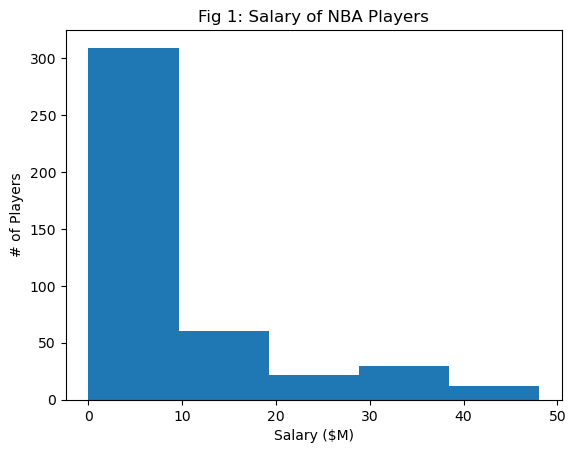

In [17]:
# Salary distribution
h = salaries.hist(column='SalaryPerMillion', bins=5, grid=False)
plt.xlabel('Salary ($M)')
plt.ylabel('# of Players')
plt.title('Fig 1: Salary of NBA Players')
plt.show()


Through further statistical analysis, it is revealed that an average salary in the NBA is about &#36;4 Million, a low salary average is almost &#36;2 Million, and an average high salary is around &#36;11 Million. This shows a wide range of salaries in which most players make at least &#36;1 Million.

In [18]:
# Descriptive Statistics
sa = salaries.Salary.describe()
print(("Minimum: ${:,d}".format(round(sa['min']))))
print(("25th Percentile: ${:,d}".format(round(sa['25%']))))
print(("Median: ${:,d}".format(round(sa['50%']))))
print(("75th Percentile: ${:,d}".format(round(sa['75%']))))

Minimum: $5,849
25th Percentile: $1,910,860
Median: $4,124,280
75th Percentile: $11,215,260


### Position and Salary
Below is shown how many players are employed at each position in the NBA. The most employed position is the shooting guards with the least being point guards. This is reasonable as the point guard controls the offence and is one of the most competitive role to compete for. The Small Forward, Power Forward and Center are relatively similar and it seems that every team employs on average two players of each position.

In [19]:
# Calculate # of players at each position
employed = salaries['Position'].value_counts()
for pos, emp in employed.items():
    print(f"{pos}: {emp}")

SG: 111
PF: 83
C: 83
SF: 82
PG: 74


The next data below shows the average salary of each position. The graph shows us that although Shooting Guards are employed the most, they actually earn the least. From previous analysis, it can be seen that the shooting guard is not a highly valuable position, compared to a power forward or a point guard. 

,Salary ($M)
Position,
C,7.524
PF,9.196
PG,12.577
SF,9.172
SG,7.207


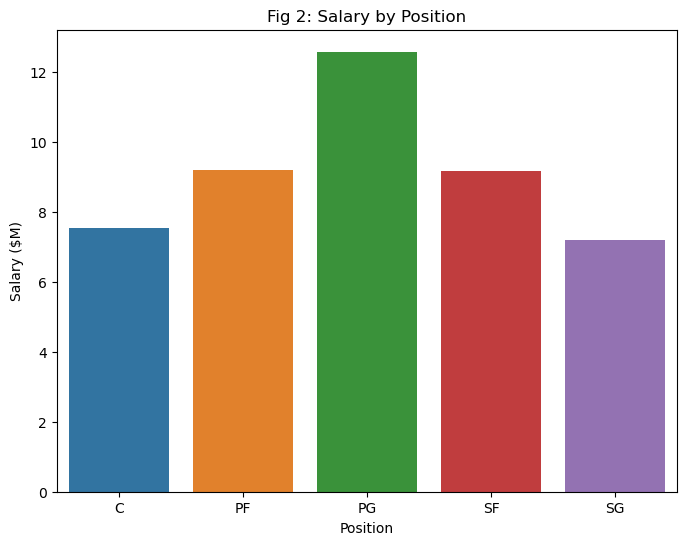

In [20]:
# Grouping Operation for average salary in each position
salaries_grouped = salaries.groupby("Position")[["SalaryPerMillion"]].mean().rename(columns={"SalaryPerMillion": "Salary ($M)"})
display(salaries_grouped)
# Set size of figure
fig, ax = plt.subplots(figsize=(8, 6))
# Generate bar plot
p = sns.barplot(x=salaries_grouped.index, y=salaries_grouped['Salary ($M)'], ax=ax).set(title='Fig 2: Salary by Position')

The plot below uses 2 advanced stats that monitor a player's performance. PER is the player efficiency rating that does calculations based on some basic stats such as points scored, field goal %, free throws made, assists, rebounds, etc. WS is win shares which looks at how much an individual player contributes to winning a game. This tells us that although point guards are paid the most on average, when we look at advanced stats it shows that position holds almost no bearing on how good a player is as the data is relatively similar. However one thing that sticks out is that shooting guards on average do not contribute heavily to winning games which confirms why they are not paid as much.

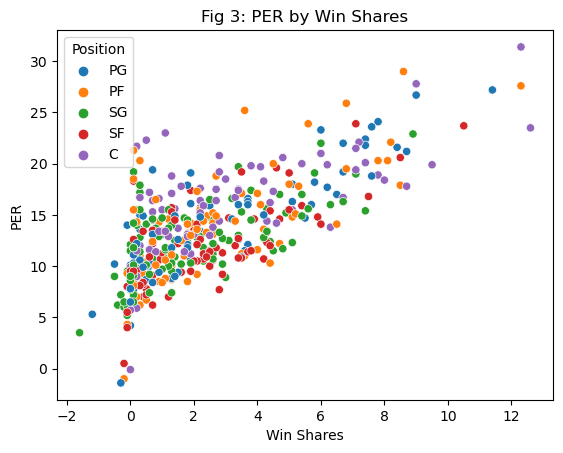

In [21]:
# Generate scatter plot to determine which positions have the best players
sns.scatterplot(data=salaries, x="WS", y="PER", hue="Position").set(title='Fig 3: PER by Win Shares', xlabel='Win Shares')
plt.show()

### Basic Player Stats, Age and Salary
Below is shown that majority of players in the NBA are between the ages of about 20 - 25 and average around 5 points per game. However, as players advance their skills and gain experience as they age, they average more points per game. The graph shows that the most skilled players are generally over the age of 25.

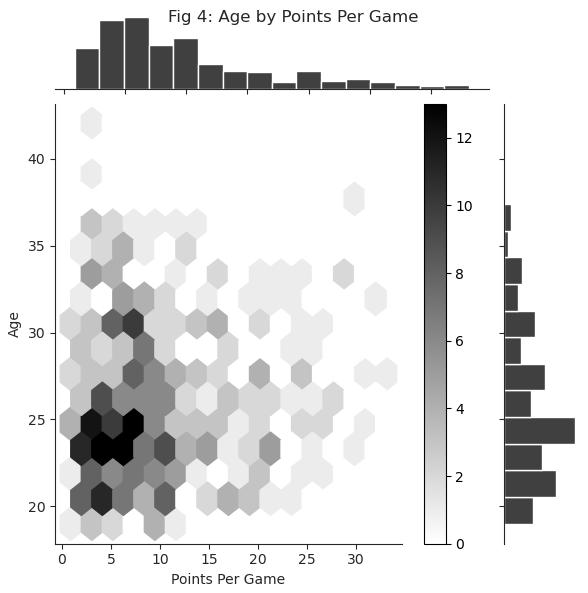

In [22]:

#Hex Graph between Age and PPG
with sns.axes_style("ticks"):
     g = sns.jointplot(y = "Age",
                   x = "PTS",
                   data = salaries,
                   kind = "hex",
                   color = "k").set_axis_labels(xlabel='Points Per Game', ylabel='Age').fig.suptitle('Fig 4: Age by Points Per Game')
plt.colorbar()
plt.show()

The regplot below analyzes the defensive and offensive ratings of a player. This was created by combining the three main offensive and defensive stats. To calibrate the defense ratings, stats of number of steals, blocks and total rebounds made per game were added together and averaged out. Similarly, the offensive rating was calibrated by adding the number of points, free throws and assists made per game, and then averaged out. The two plots show us a trend that players rank higher and earn more as their ratings increase. 

Unsurprisingly, offensive ratings play a big role as there are slightly more players at the peak. However, the defensive ratings were also on par, concluding that the NBA only recruits all around players with advanced skillsets.  

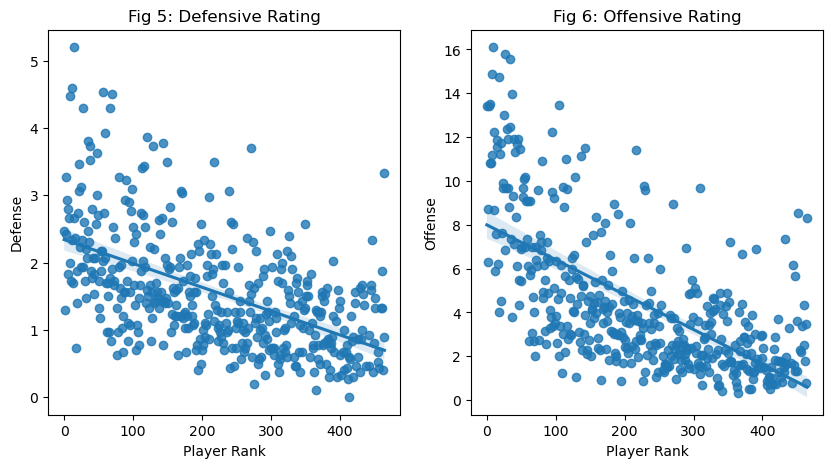

In [23]:
# Create Data Frame to store defensive and offensive stats
offense_defense = pd.DataFrame({
    'Rank (based on salary)': salaries['Rank'],
    'PlayerName': salaries['Player Name'],
    'Salary': salaries['SalaryPerMillion'],
    'defense': ((salaries['STL'] + salaries['TRB'] + salaries['BLK']) / 3).round(2),
    'offense': ((salaries['PTS'] + salaries['FT'] + salaries['AST']) / 3).round(2),
    
})
# Set size of figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
#Generate two scatter plots for defensive and offensive ratings
sns.regplot(x=offense_defense['Rank (based on salary)'], y=offense_defense['defense'], ax=ax1).set(title='Fig 5: Defensive Rating', xlabel='Player Rank', ylabel='Defense')
sns.regplot(x=offense_defense['Rank (based on salary)'], y=offense_defense['offense'], ax=ax2).set(title='Fig 6: Offensive Rating', xlabel='Player Rank', ylabel='Offense')
plt.show()


The top five players from both offensive and defensive ratings have been displayed which has somewhat disproven the statement made above. Although, the top five defensive players have high ratings from their respective side, 60% of them also have high offensive ratings. On the contrary, out of the top 5 offensive players, 60% have poor defensive ratings. These findings show that you do not necessarily have to be an all around player to be at the top.

One player that appeared on both sides of the ratings is Giannis Antetokounmpo. This player earns the most salary out of the 9 players and through this analysis, the best all around NBA player may have been found.

In [24]:
# Remove column for better aesthetics
offense_defense = offense_defense.drop(columns=['Rank (based on salary)'])
# Sort players by defensive rating
top_5_defense = offense_defense.sort_values(by='defense', ascending=False)
print(f'Top 5 Defense')
display(top_5_defense.head(5))
# Sort players by offensive rating
top_5_offense = offense_defense.sort_values(by='offense', ascending=False)
print(f'Top 5 Offense')
display(top_5_offense.head(5))



Top 5 Defense


,PlayerName,Salary,defense,offense
14,Anthony Davis,37.98,5.20,11.57
12,Rudy Gobert,38.17,4.60,5.90
56,Domantas Sabonis,21.10,4.53,10.17
69,Steven Adams,17.93,4.50,4.00
8,Giannis Antetokounmpo,42.49,4.47,14.90


Top 5 Offense


,PlayerName,Salary,defense,offense
9,Damian Lillard,42.49,2.00,16.10
27,Joel Embiid,33.62,4.30,15.77
34,Shai Gilgeous-Alexander,30.91,2.47,15.57
8,Giannis Antetokounmpo,42.49,4.47,14.90
18,Trae Young,37.10,1.40,14.73


## Discussion ##

For this project, I explored a dataset on the salaries of all NBA players in the 2022/23 season, focusing on the relationships between in-game player statistics, player positions, and age with respect to salary. An exploratory data analysis was done which validated the initial hypothesis. Player stats, age and position all heavily contributed to their individual annual earnings. 

One of the tests determined that the average salary in the NBA is &#36;4 million dollars and the average earnings range is anywhere between &#36;5,000 and &#36;10 Million. The pay gap was found to be relatively huge between the best 100+ players in the NBA compared to the rest. For positions, it was found that shooting guards are employed the most but are paid the least on average because they are not individually efficient on the court and have the least win shares. However, the other positions have relatively average salaries based on their performance except for point guards that earn a whopping &#36;12 million on average. Their high salaries are understood as point guards produce the most plays, points and their overall performance wins games. The next analysis showed the average age of current players in the NBA is between the ages of  20 - 25 years old, but surprisingly they only average 5 points per game. The trend showed that as you get older and more skilled, you average more points per game. There were still a few outliers in this test, as there are a few star players playing above their age level and averaging over 25 points per game. Finally, the defensive and offensive rankings were created using the stats such as blocks, rebounds and total points per game. The reason to explore these variables was to determine what aspect of the NBA is most valuable in terms of skill, and how that transfers to the type of salary each player earns. In both ratings, the majority of players were evenly distributed, however the offense had more players near the peak of the rating. 

The outcomes of these manipulations suggested that you need to be an all around player to receive an average high salary of almost &#36;12 million. Surprisingly, out of the top 10 players currently in the NBA, only one all around player who had multiple skill sets was found. This concludes that if a basketball player perfects his skills in only one category such as offense or defense, there is a higher chance of earning &#36;40 million or more.


## References
1. Source data - https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season
2. NBA Source - https://www.nba.com
3. Pandas for data manipulation
4. Seaborn for data viz
5. Matplotlib for data viz